In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
path = "./sims/extra_power/"
scales = np.linspace(1,3,9)

In [12]:
scales

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ])

In [13]:
means = []
var = []
for s in scales:
    dfs = []
    m = []
    v = []
    for i in range(10):
        filename = path + "extra_power_{}_{}".format(round(s,2),i)
        dfs.append(pd.read_csv(filename, names=['total_cost', 'true_demand', 'demand_sd', '2x_sup_sd', 'ren_sup', 'rem_demand']))
        try:
            dfs[i] = dfs[i].drop(730)
        except:
            pass
        dfs[i]["total_cost"] = pd.to_numeric(dfs[i]["total_cost"], downcast="float")
        dfs[i]['avg_cost'] = dfs[i]['total_cost'] / dfs[i]['true_demand']
        m.append(dfs[i]['avg_cost'].mean())
        v.append((dfs[i]['avg_cost'].var()))
    m = np.array(m)
    v = np.array(v)
    means.append(m.mean())
    var.append(v.mean())


In [14]:
var

[70.03060021328405,
 74.97694186376911,
 83.39598779606666,
 90.17082574844866,
 104.24278995375332,
 117.51351924897992,
 127.60681512187709,
 150.9088300884562,
 203.13597381983445]

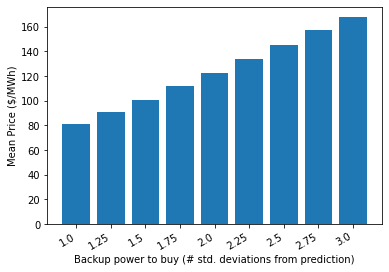

In [15]:
fig,ax = plt.subplots()
ax.bar(np.arange(9),means,tick_label=[round(x,2) for x in scales])
ax.set_xticklabels([round(x,2) for x in scales], rotation=30, ha='right')
ax.set_xlabel("Backup power to buy (# std. deviations from prediction)")
ax.set_ylabel("Mean Price ($/MWh)")
plt.savefig("extra_power_vs_avg_price_sensitivity.png")

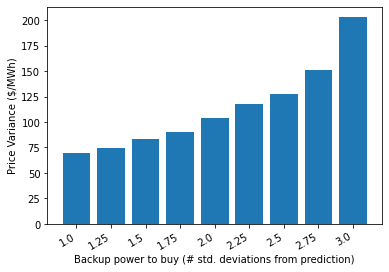

In [16]:
fig,ax = plt.subplots()
ax.bar(np.arange(9),var,tick_label=[round(x,2) for x in scales])
ax.set_xticklabels([round(x,2) for x in scales], rotation=30, ha='right')
ax.set_xlabel("Backup power to buy (# std. deviations from prediction)")
ax.set_ylabel("Price Variance ($/MWh)")
plt.savefig("extra_power_vs_price_variance_sensitivity.png")